In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [3]:
DataFrame = df = pd.read_csv('clean_dataframe_Seattle.csv')
DataFrame['Customer_Gender'] = DataFrame['Customer_Gender'].apply(lambda s: str(s).replace('mostly_female', "female"))
DataFrame['Customer_Gender'] = DataFrame['Customer_Gender'].apply(lambda s: str(s).replace('mostly_male', "male"))

C:\Users\Prudhvi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (12,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
DataFrame = DataFrame.rename(columns={'Customer_Rating': 'Customer_Review_Rating'})

In [5]:
DataFrame.head()

,Unnamed: 0,Business_Name,Business_ReviewCount,Business_Rating,Business_Claim_status,Customer_Friends_count,Customer_Reviews_count,Customer_Photos_count,Customer_Elite,Customer_Review_Rating,...,Cleaned_Customer_Review,review_word_count,review_char_count,review_avg_word_length,review_sentence_count,review_avg_sentence_length,polarity,subjectivity,Sentiment_Score,Business_Operational_Hours
0,0,Britsport of Seattle,1,5.0,0,0,4,0,No,5,...,the best shop in the puget sound region for br...,44,250,4.704545,4,11.000000,0.483333,0.309524,Positive,NaN
1,1,Service King Collision West Seattle,31,4.0,1,13,3,0,No,5,...,had such a great experience with this place ba...,49,273,4.591837,3,16.333333,0.092593,0.482407,Positive,11.0
2,2,Service King Collision West Seattle,31,4.0,1,7,105,5,No,5,...,these guns are polite professional techsavvy a...,104,591,4.605769,4,26.000000,0.403846,0.656838,Positive,11.0
3,3,Service King Collision West Seattle,31,4.0,1,373,243,601,Yes,4,...,unfortunately give had to make use of service ...,74,421,4.702703,5,14.800000,-0.098333,0.458333,Negative,11.0
4,4,Service King Collision West Seattle,31,4.0,1,0,9,0,No,1,...,these guns are the worst i brought my truck he...,378,2047,4.415344,21,18.000000,0.003324,0.381061,Positive,11.0


In [6]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97584 entries, 0 to 97583
Data columns (total 35 columns):
Unnamed: 0                         97584 non-null int64
Business_Name                      97584 non-null object
Business_ReviewCount               97584 non-null int64
Business_Rating                    97584 non-null float64
Business_Claim_status              97584 non-null int64
Customer_Friends_count             97584 non-null int64
Customer_Reviews_count             97584 non-null int64
Customer_Photos_count              97584 non-null int64
Customer_Elite                     97584 non-null object
Customer_Review_Rating             97584 non-null int64
Customer_Review                    97584 non-null object
Customer_Review_Date               97584 non-null object
Customer_Review_Uploaded_Photos    97584 non-null object
Customer_Review_Useful             97584 non-null int64
Customer_Review_Funny              97584 non-null int64
Customer_Review_Cool               97584 non

In [7]:
# function to plot Boxplot
def Boxplot(categorical, continious, df):
    plt.figure(figsize=(10, 8))
    fig = sns.boxplot(x=categorical, y=continious, hue=categorical,showmeans=True, data=df)    
    plt.title("Boxplot for {0} VS {1}".format(categorical,continious), fontsize=15)
    plt.xlabel(categorical, fontsize=15)
    plt.ylabel(continious, fontsize=15)
    plt.legend(bbox_to_anchor=(1,1), loc=1)
    
    medians = df.groupby(categorical)[continious].median()
    for i in range(len(medians)):
        fig.annotate(str(medians[i]), xy= (i,medians[i]), horizontalalignment ='center')
    
    return 0


# function to plot barplot
def Barplot(categorical1,categorical2,df):
    df = df.groupby([categorical1, categorical2]).size().reset_index()
    df = df.pivot(columns=categorical1, index=categorical2, values=0).reset_index()
    print(df)
    fig = df.set_index(categorical2).T.plot(kind='bar', stacked=True, color=sns.color_palette())
    fig.figure.set_size_inches(10,8)
    fig.figure.suptitle('Barplot for {0} vs {1}'.format(categorical1,categorical2), fontsize=15)
    plt.xlabel(categorical1, fontsize=15)
    plt.ylabel('count of Business Response', fontsize=15)
    
    return 0

## BusinessResponse by owners for Reviews (Target Variable)

From the below plot we can see the Business Response for the reviews in the DataFrame. we have Total of **97584** reveiws out of which the Business Owners are responded for **17804** reviews and Not Responded for **79780** reviews.

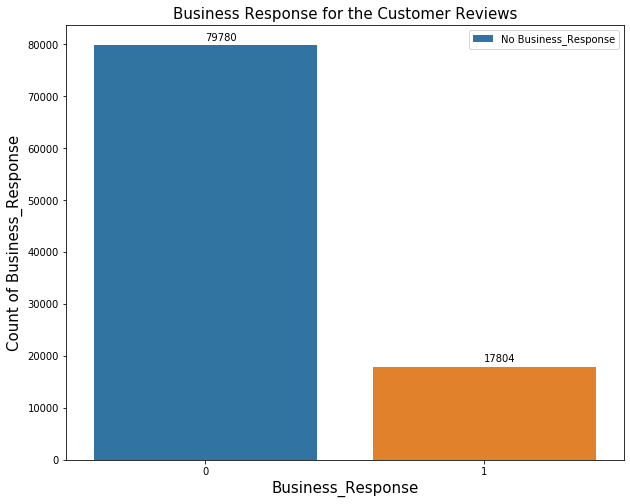

In [28]:
plt.figure(figsize=(10, 8))
fig = sns.countplot(x ='Business_Response', data = DataFrame)
plt.title("Business Response for the Customer Reviews",fontsize=15)
plt.xlabel('Business_Response', fontsize=15)
plt.ylabel('Count of Business_Response', fontsize=15)
plt.legend(labels=['No Business_Response', 'yes'])

counts = DataFrame['Business_Response'].value_counts()
for i, value in counts.reset_index().iterrows():
    fig.text(i, value.Business_Response + 1000 ,value.Business_Response, color='black')

### Business_Response Based on Business Features

####  Business_Response VS Business_ReviewCount

We observed that businesses with more reviews are more likely to respond to customer reviews than businesses with less reviews.We can also see that the Mean of Business Reviews is high for businesses that actively respond to reviews.

0

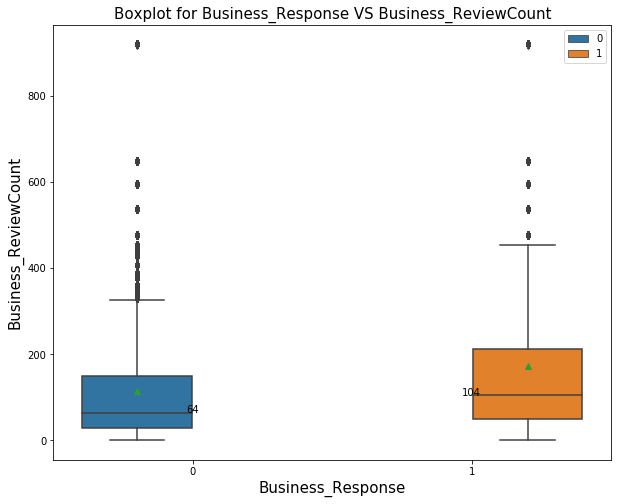

In [29]:
Boxplot("Business_Response", "Business_ReviewCount",DataFrame)

####  Business_Response VS Business_Rating

0

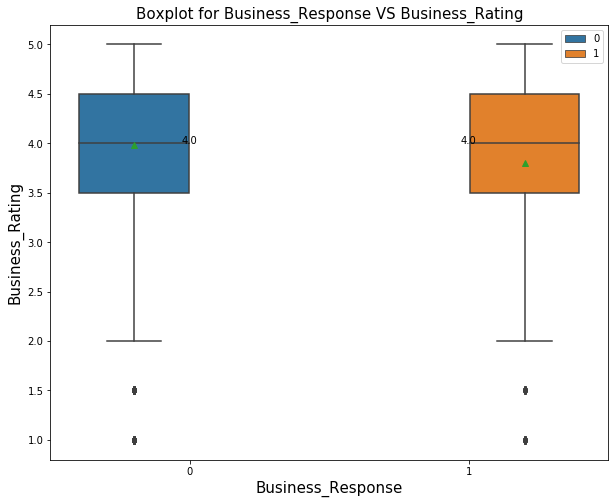

In [30]:
Boxplot("Business_Response", "Business_Rating",DataFrame)

#### Business_Response VS Business_Claim_status

Business_Response  Business_Claim_status      0      1
0                                      0  16102    459
1                                      1  63678  17345


0

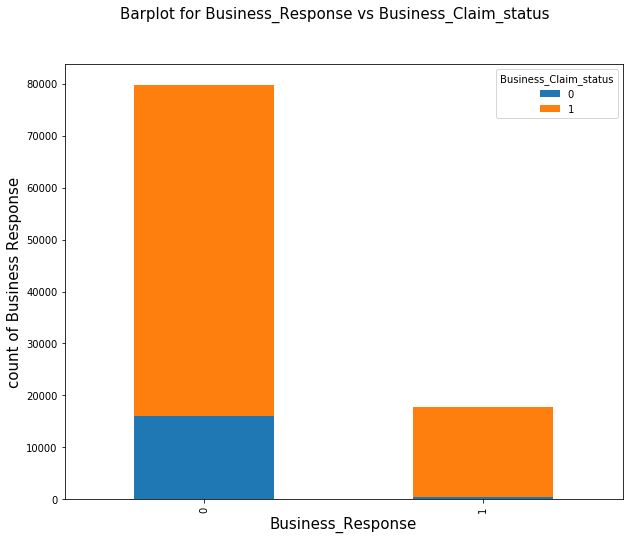

In [31]:
Barplot("Business_Response","Business_Claim_status",DataFrame)

### Business_Response Based on Customer Features

#### Business_Response VS Customer_Rating

Business_Response  Customer_Review_Rating      0      1
0                                       1  15114   5124
1                                       2   2875   1028
2                                       3   1710    433
3                                       4   5305   1002
4                                       5  54776  10217


0

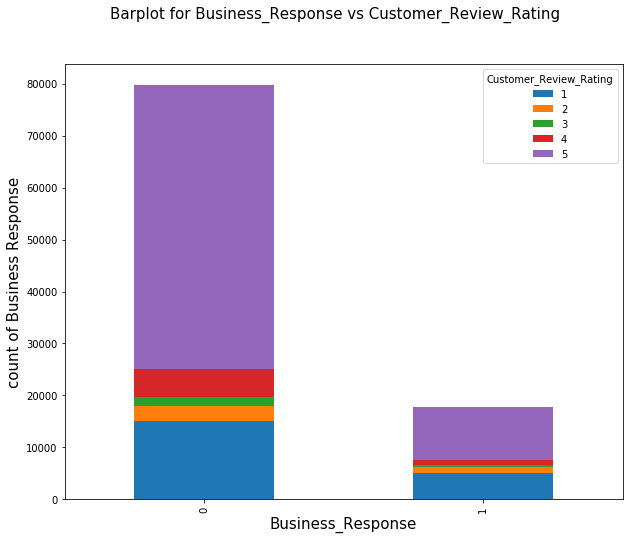

In [32]:
Barplot("Business_Response","Customer_Review_Rating",DataFrame)

#### Business_Response VS Category

Business_Response            Category      0     1
0                          AutoRepair  23695  6203
1                            Flooring  10696  1833
2                                HVAC   8415  1443
3                            Handyman  11772  3580
4                            Painters   2448   292
5                            Plumbing   2748   356
6                               Tires  15818  2671
7                  TransmissionRepair   4188  1426


0

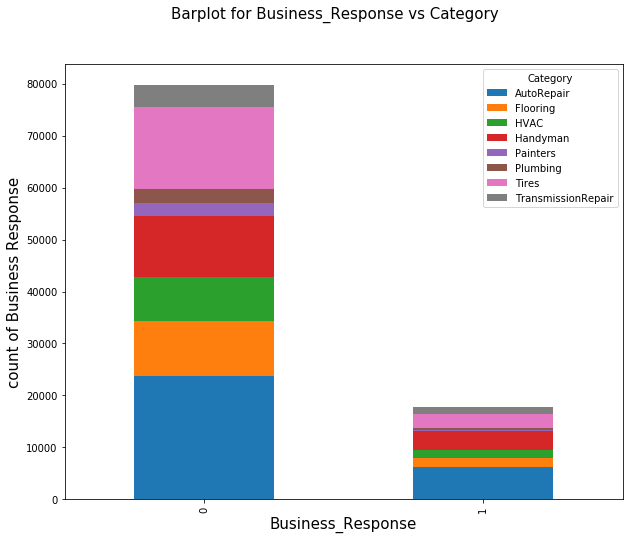

In [33]:
Barplot("Business_Response","Category",DataFrame)

#### Business_Response  VS Customer_Gender

Business_Response Customer_Gender      0     1
0                          female  30526  6959
1                            male  33982  7419
2                         unknown  15272  3426


0

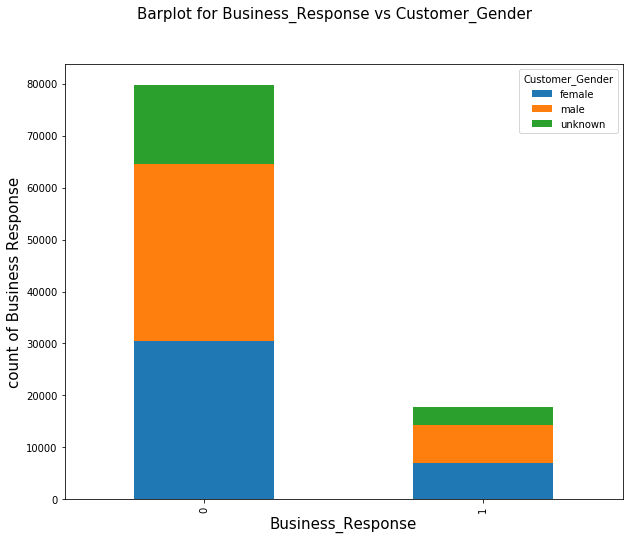

In [34]:
Barplot("Business_Response","Customer_Gender",DataFrame)

### Business Response Based on Reviews data

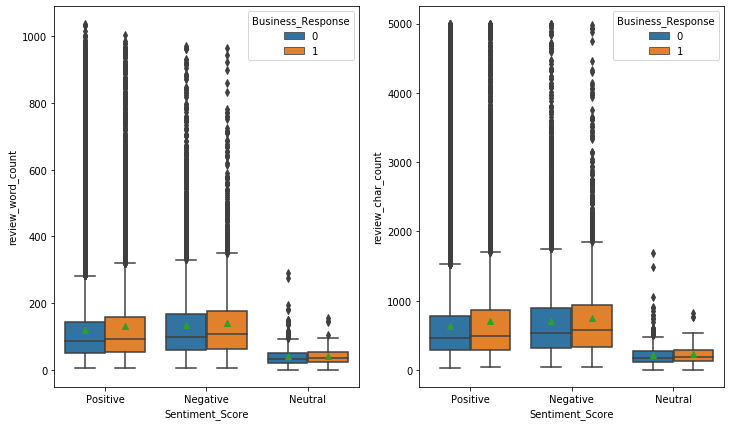

In [39]:
fig, ax = plt.subplots(1,2, figsize=(12,7))
sns.boxplot(x="Sentiment_Score", y="review_word_count", hue="Business_Response",showmeans=True, data=DataFrame,ax=ax[0])
sns.boxplot(x="Sentiment_Score", y="review_char_count", hue="Business_Response",showmeans=True, data=DataFrame,ax=ax[1]) 
# sns.boxplot(x="Sentiment_Score", y="review_avg_word_length", hue="Business_Response",showmeans=True, data=DataFrame,ax=ax[1,0]) 
# sns.boxplot(x="Sentiment_Score", y="review_sentence_count", hue="Business_Response",showmeans=True, data=DataFrame,ax=ax[1,1]) 
# sns.boxplot(x="Sentiment_Score", y="polarity", hue="Business_Response",showmeans=True, data=DataFrame,ax=ax[2,0]) 
# sns.boxplot(x="Sentiment_Score", y="subjectivity", hue="Business_Response",showmeans=True, data=DataFrame,ax=ax[2,1])

#### Business_Response VS Sentiment_Score

Business_Response Sentiment_Score      0      1
0                        Negative   8775   2512
1                         Neutral    653    171
2                        Positive  70352  15121


0

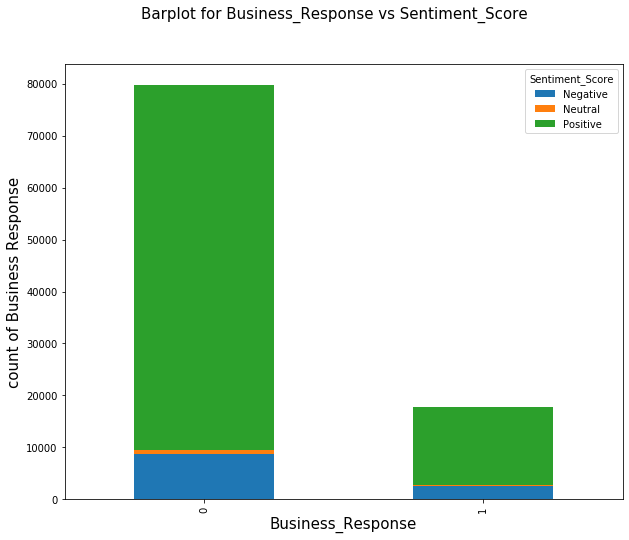

In [38]:
Barplot("Business_Response","Sentiment_Score",DataFrame)

In [39]:
DataFrame[[ 'review_word_count',  'review_char_count', 'review_avg_word_length','review_sentence_count', 'review_avg_sentence_length' ,'polarity' , 'subjectivity','Sentiment_Score']].head()

,review_word_count,review_char_count,review_avg_word_length,review_sentence_count,review_avg_sentence_length,polarity,subjectivity,Sentiment_Score
0,44,250,4.704545,4,11.000000,0.483333,0.309524,Positive
1,49,273,4.591837,3,16.333333,0.092593,0.482407,Positive
2,104,591,4.605769,4,26.000000,0.403846,0.656838,Positive
3,74,421,4.702703,5,14.800000,-0.098333,0.458333,Negative
4,378,2047,4.415344,21,18.000000,0.003324,0.381061,Positive


In [48]:
stats = DataFrame[['Business_Rating', 'Business_Response']].copy()

In [50]:
stats.groupby("Business_Response").std()

,Business_Rating
Business_Response,
0,0.875763
1,0.763785


In [51]:
stats.groupby("Business_Response").mean()

,Business_Rating
Business_Response,
0,3.980666
1,3.804847


In [21]:
options = ['AutoRepair', 'TransmissionRepair', 'Handyman']

# options = ['Science', 'Commerce'] 
    
# selecting rows based on condition 
Data = DataFrame[DataFrame['Category'].isin(options)] 

# dff.to_csv('')


In [23]:
Data['Business_Response'].value_counts()

0    39655
1    11209
Name: Business_Response, dtype: int64

In [9]:
Category_wise= {'AutoRepair' : 20.74720717,
                'Flooring': 14.63005826,
                'HVAC': 14.63785758,
                'Handyman':23.31943721,
                'Painters':10.65693431,
                'Plumbing':11.46907216,
                'Tires':14.44642761,
                'TransmissionRepair':25.40078375}



rating= {'1': 25.31870738,
            '2':26.33871381,
            '3':20.20531965,
            '4':15.88710956,
            '5':15.72015448
            }


sentiment = { 'Negative' :22.25569239,
                'Netural':20.75242718,
                'Positive':17.69096674
                }



In [41]:
print(Category_wise.keys())
print(Category_wise.values())

dict_keys(['AutoRepair', 'Flooring', 'HVAC', 'Handyman', 'Painters', 'Plumbing', 'Tires', 'TransmissionRepair'])
dict_values([20.74720717, 14.63005826, 14.63785758, 23.31943721, 10.65693431, 11.46907216, 14.44642761, 25.40078375])


In [43]:
data = {'category':['AutoRepair', 'Flooring', 'HVAC', 'Handyman', 'Painters', 'Plumbing', 'Tires', 'TransmissionRepair'],
'value': [20.74720717, 14.63005826, 14.63785758, 23.31943721, 10.65693431, 11.46907216, 14.44642761, 25.40078375]}


category = pd.DataFrame.from_dict(data)

In [ ]:
plt.figure(figsize=(10, 8))
fig = sns.countplot(x ='Business_Response', data = category)
plt.title("Business Response for the Customer Reviews",fontsize=15)
plt.xlabel('Business_Response', fontsize=15)
plt.ylabel('Count of Business_Response', fontsize=15)
plt.legend(labels=['No Business_Response', 'yes'])

# counts = DataFrame['Business_Response'].value_counts()
# for i, value in counts.reset_index().iterrows():
#     fig.text(i, value.Business_Response + 1000 ,value.Business_Response, color='black')

Text(0, 0.5, 'Business Response Rate')

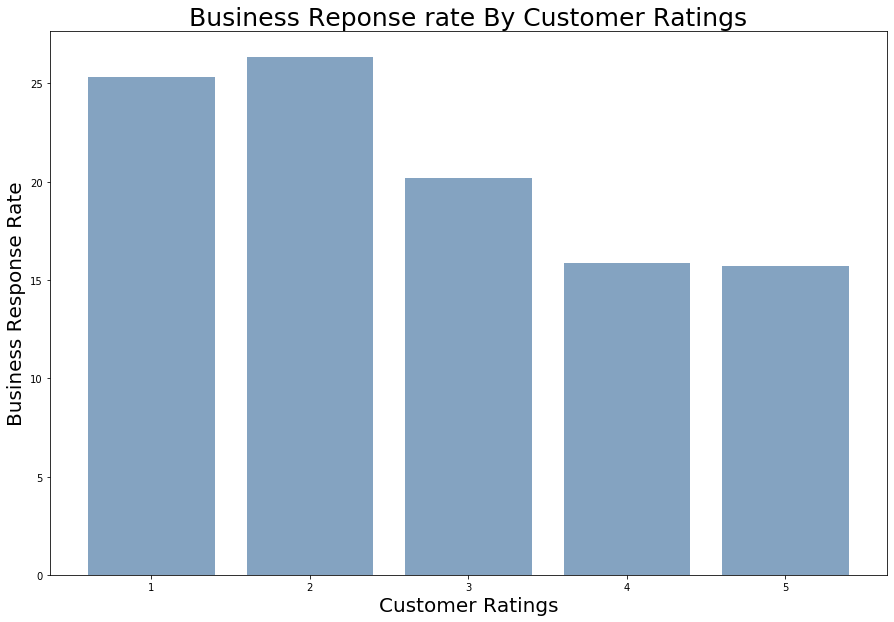

In [10]:
keys = rating.keys()
values = rating.values()

plt.figure(figsize=(15,10))
fig= plt.bar(keys, values, color=[0.2, 0.4, 0.6, 0.6])
# Add title and axis names
plt.title('Business Reponse rate By Customer Ratings', fontsize=25)
plt.xlabel('Customer Ratings', fontsize= 20)
plt.ylabel('Business Response Rate', fontsize= 20)



In [58]:
from textblob import TextBlob

# Sample sentence for N-gram detection
sentence = "Technology is best when it brings people together"
ngram_object = TextBlob(sentence)

In [59]:
ngrams = ngram_object.ngrams(n=2) # Computing Bigrams
print(ngrams) 

[WordList(['Technology', 'is']), WordList(['is', 'best']), WordList(['best', 'when']), WordList(['when', 'it']), WordList(['it', 'brings']), WordList(['brings', 'people']), WordList(['people', 'together'])]
